In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import yfinance as yf
import datetime as dt

stock="GS"
start=dt.datetime(2000,1,1)
end=dt.datetime(2025,11,1)
df=yf.download(stock,start,end)

C:\Users\Rudraksh kaushik\AppData\Local\Temp\ipykernel_17624\170716274.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,GS,GS,GS,GS,GS
Date,,,,,
2000-01-03,61.663677,65.896782,61.270915,65.765861,1822600
2000-01-04,57.779663,61.096320,57.430541,60.747199,1647700
2000-01-05,55.073982,57.168714,54.724860,56.470470,1516600
2000-01-06,57.430546,59.001594,54.899412,54.899412,1845100
2000-01-07,57.648777,58.085180,55.772246,57.997899,1127400


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,GS,GS,GS,GS,GS
Date,,,,,
2025-09-08,741.849976,743.539978,733.570007,739.419983,1400100
2025-09-09,763.919983,765.619995,738.539978,740.130005,2611300
2025-09-10,769.580017,774.469971,761.630005,761.859985,1996200
2025-09-11,784.729980,793.169983,771.349976,772.000000,2075700
2025-09-12,780.059998,787.030029,776.260010,783.500000,1099400


In [6]:
df.shape

(6463, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6463 entries, 2000-01-03 to 2025-09-12
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (Close, GS)   6463 non-null   float64
 1   (High, GS)    6463 non-null   float64
 2   (Low, GS)     6463 non-null   float64
 3   (Open, GS)    6463 non-null   float64
 4   (Volume, GS)  6463 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 303.0 KB


In [8]:
df.isnull().sum()

Price   Ticker
Close   GS        0
High    GS        0
Low     GS        0
Open    GS        0
Volume  GS        0
dtype: int64

In [9]:
df=df.reset_index()

In [10]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GS,GS,GS,GS,GS
0,2000-01-03,61.663677,65.896782,61.270915,65.765861,1822600
1,2000-01-04,57.779663,61.096320,57.430541,60.747199,1647700
2,2000-01-05,55.073982,57.168714,54.724860,56.470470,1516600
3,2000-01-06,57.430546,59.001594,54.899412,54.899412,1845100
4,2000-01-07,57.648777,58.085180,55.772246,57.997899,1127400


In [11]:
df.columns

MultiIndex([(  'Date',   ''),
            ( 'Close', 'GS'),
            (  'High', 'GS'),
            (   'Low', 'GS'),
            (  'Open', 'GS'),
            ('Volume', 'GS')],
           names=['Price', 'Ticker'])

In [12]:
data01=df.to_csv("C:\\Users\\Rudraksh kaushik\\OneDrive\\Desktop\\DatasciencePRactice\\Datasets\\GSS.csv")

In [13]:
data01=pd.read_csv("C:\\Users\\Rudraksh kaushik\\OneDrive\\Desktop\\DatasciencePRactice\\Datasets\\GSS.csv")

In [14]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,GS,GS,GS,GS,GS
1,0,2000-01-03,61.66367721557617,65.8967817378061,61.270914940317724,65.76586097938662,1822600
2,1,2000-01-04,57.7796630859375,61.09632048361971,57.430541254602524,60.74719865228474,1647700
3,2,2000-01-05,55.07398223876953,57.16871373438042,54.72486032283438,56.47046990251012,1516600
4,3,2000-01-06,57.430545806884766,59.00159417242265,54.89941232907373,54.89941232907373,1845100


In [ ]:

import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "browser"

fig = go.Figure(data=[go.Candlestick(x=data01['Date'],
                                     open=data01['Open'],
                                     high=data01['High'],
                                     low=data01['Low'],
                                     close=data01['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

##  This code will show up in broweser.


In [20]:
df=df.drop(['Date'],axis=1)
df.head()

C:\Users\Rudraksh kaushik\AppData\Local\Temp\ipykernel_17624\3471825329.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



Price,Close,High,Low,Open,Volume
Ticker,GS,GS,GS,GS,GS
0,61.663677,65.896782,61.270915,65.765861,1822600
1,57.779663,61.096320,57.430541,60.747199,1647700
2,55.073982,57.168714,54.724860,56.470470,1516600
3,57.430546,59.001594,54.899412,54.899412,1845100
4,57.648777,58.085180,55.772246,57.997899,1127400


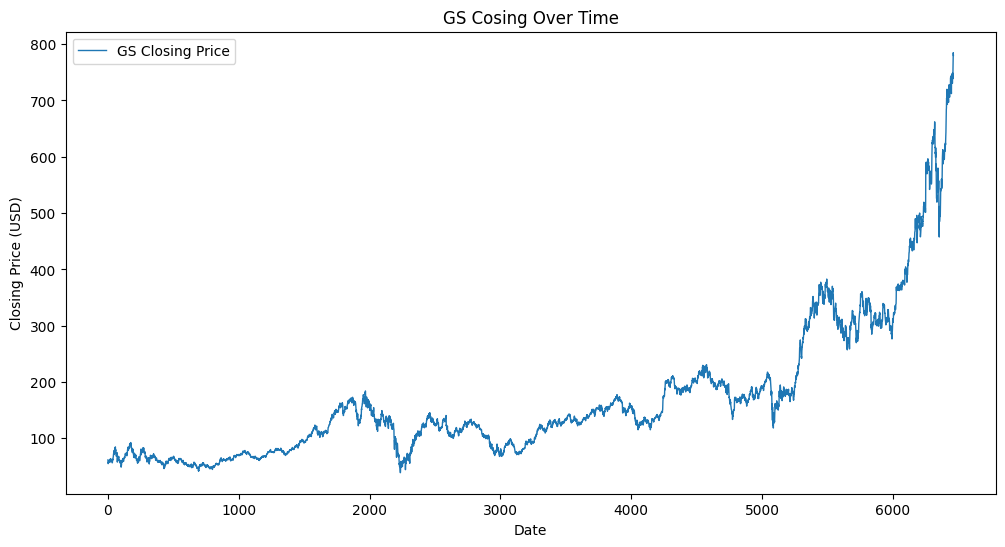

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'],label=f'{stock} Closing Price',linewidth=1)
plt.title(f'{stock} Cosing Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

In [24]:
ma200=df.Close.rolling(200).mean()
ma100=df.Close.rolling(100).mean()

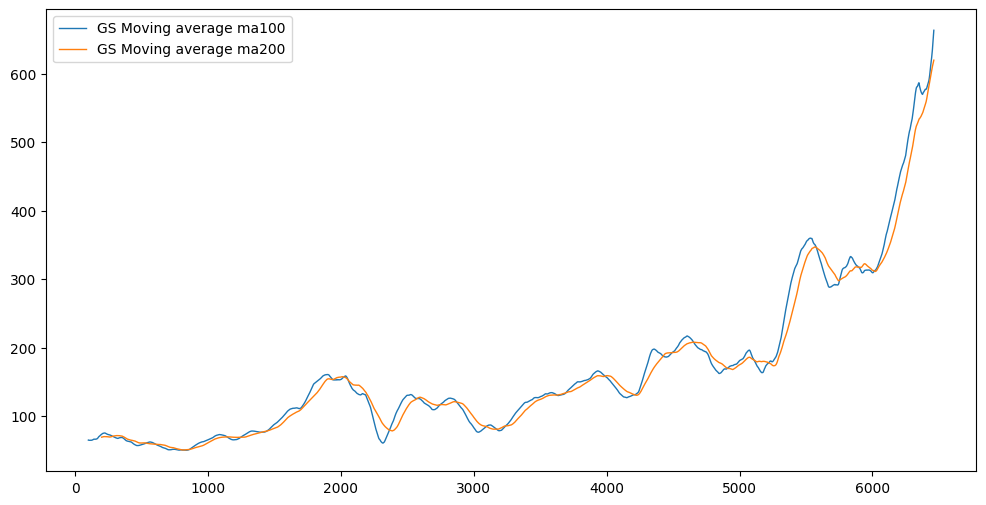

In [26]:
plt.figure(figsize=(12,6))
plt.plot(ma100,label=f'{stock} Moving average ma100',linewidth=1)
plt.plot(ma200,label=f'{stock} Moving average ma200',linewidth=1)
plt.legend()
plt.show()

In [27]:
# Training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [28]:
data_training.shape

(4524, 1)

In [29]:
data_testing.shape

(1939, 1)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [31]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.12551821],
       [0.10404338],
       [0.0890836 ],
       ...,
       [0.97285211],
       [1.        ],
       [0.99050061]], shape=(4524, 1))

In [32]:
data_training_array.shape[0]

4524